<a href="https://colab.research.google.com/github/seoyeonmmn/python_basic/blob/main/NLP_with_Pytorch_chapter01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### code 1-1 One-Hot Encoding or Binary Explanation with Scikitlearn

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


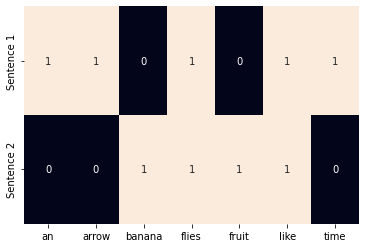

In [3]:
corpus =['Time flies like an arrow.',
         'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)       # 텍스트에서 단위별 등장횟수를 카운팅하여 수치벡터화
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot = True,
            cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

#### code 1-2 TF-IDF with Scikitlearn

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

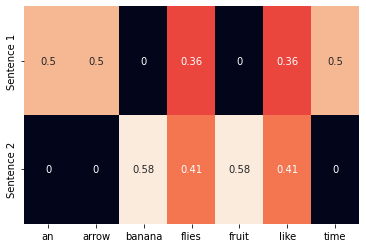

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot = True, cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

#### 1.4.2 Tensor 만들기

In [1]:
def describe(x):
  print("Type: {}".format(x.type()))
  print("Size: {}".format(x.shape))
  print("Value: {}".format(x))

In [2]:
import torch
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[ 2.5527e-03,  4.5757e-41,  2.5527e-03],
        [ 4.5757e-41, -7.2018e+34,  4.5755e-41]])


In [3]:
# Randomly initializing a tensor
describe(torch.rand(2, 3))    # Normal Distribution
describe(torch.randn(2, 3))   # Standard Normal Distribution (avg = 0, std = 0)

Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[0.2349, 0.8543, 0.5478],
        [0.3598, 0.2494, 0.0930]])
Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[-0.0219,  1.1914, -0.2646],
        [-0.6655,  2.4702, -0.3127]])


In [4]:
# using method filled()
describe(torch.zeros(2, 3))

x = torch.ones(2, 3)
describe(x)

x.fill_(5)
describe(x)

Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [5]:
# List To Tensor
import torch
import numpy as np

arr = np.random.rand(2, 3)
describe(torch.from_numpy(arr))


Type: torch.DoubleTensor
Size: torch.Size([2, 3])
Value: tensor([[0.2668, 0.4846, 0.7630],
        [0.7899, 0.5743, 0.9463]], dtype=torch.float64)


#### 1.4.3 Tensor Type and Size

Tensor에는 type과 size가 있다. torch.Tensor 생성자를 사용할 때 기본 tensor type은 torch.FloatTensor 이다.    
Tensor type은 초기화 시 지정가능하며 casting method를 사용해 float, long, double 등으로 바꿀 수 있다. 

In [6]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [7]:
x = x.long()
describe(x)

Type: torch.LongTensor
Size: torch.Size([2, 3])
Value: tensor([[1, 2, 3],
        [4, 5, 6]])


In [10]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype = torch.int64)
describe(x)

Type: torch.LongTensor
Size: torch.Size([2, 3])
Value: tensor([[1, 2, 3],
        [4, 5, 6]])


In [11]:
x = x.float()
describe(x)

Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### 1.4.4 Tensor 연산

In [14]:
# add()

x = torch.rand(2, 3)
print(x)
print(torch.add(x, x))
print(x+x)

tensor([[0.5956, 0.6292, 0.6776],
        [0.1866, 0.9079, 0.3841]])
tensor([[1.1912, 1.2584, 1.3553],
        [0.3733, 1.8159, 0.7683]])
tensor([[1.1912, 1.2584, 1.3553],
        [0.3733, 1.8159, 0.7683]])


In [19]:
# 차원 별 tensor 연산

x =torch.arange(6)
print(x)

x = x.view(2, 3)
print(x)

tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [20]:
print(torch.sum(x, dim=0))
print(torch.sum(x, dim=1))

tensor([3, 5, 7])
tensor([ 3, 12])


In [21]:
# transpose
describe(x)
describe(torch.transpose(x, 0, 1))

Type: torch.LongTensor
Size: torch.Size([2, 3])
Value: tensor([[0, 1, 2],
        [3, 4, 5]])
Type: torch.LongTensor
Size: torch.Size([3, 2])
Value: tensor([[0, 3],
        [1, 4],
        [2, 5]])


#### 1.4.5 Indexing, Slicing and Concentenating

In [22]:
x = torch.arange(6).view(2, 3)
describe(x)

Type: torch.LongTensor
Size: torch.Size([2, 3])
Value: tensor([[0, 1, 2],
        [3, 4, 5]])


In [23]:
describe(x[:1, :2])

Type: torch.LongTensor
Size: torch.Size([1, 2])
Value: tensor([[0, 1]])


In [24]:
describe(x[0, 1])

Type: torch.LongTensor
Size: torch.Size([])
Value: 1


In [25]:
# Complex indexing
idx = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index = idx))

Type: torch.LongTensor
Size: torch.Size([2, 2])
Value: tensor([[0, 2],
        [3, 5]])


In [26]:
idx = torch.LongTensor([0, 0]) # 같은 idx 반복해서 입력하여 해당 행 또는 열도 입력된 수 만큼 반복함.
describe(torch.index_select(x, dim=0, index = idx))

Type: torch.LongTensor
Size: torch.Size([2, 3])
Value: tensor([[0, 1, 2],
        [0, 1, 2]])


In [29]:
row_idx = torch.arange(2).long()  
col_idx = torch.LongTensor([0, 2])
x[row_idx, col_idx]  # x[(0, 1), (0, 2)] => x[0, 0] = 0, x[1, 2] = 5

tensor([0, 5])

In [30]:
# Concatenationg Tensors

x = torch.arange(6).view(2, 3)
describe(x)

Type: torch.LongTensor
Size: torch.Size([2, 3])
Value: tensor([[0, 1, 2],
        [3, 4, 5]])


In [31]:
print(torch.cat([x, x], dim=0))
print(torch.cat([x, x], dim=1))

tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [32]:
# stacking

torch.stack([x, x])

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])

In [35]:
# multiply

x1 = torch.arange(6).view(2, 3).float()
describe(x1)

x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

Type: torch.FloatTensor
Size: torch.Size([2, 3])
Value: tensor([[0., 1., 2.],
        [3., 4., 5.]])
Type: torch.FloatTensor
Size: torch.Size([3, 2])
Value: tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [36]:
torch.mm(x1, x2)  # 같은 type끼리 계산 가능함.

tensor([[ 3.,  6.],
        [12., 24.]])

#### 1.4.6 Tensor and Calculation graph
`requires_grad = True`로 tensor를 생성하면 pytorch는 gradient 계산에 사용하는 부가 정보를 관리한다.   
  1. forward propagation 계산의 값을 계산
  1. 스칼라 값 하나를 사용해 backpropagation 진행

In [37]:
x = torch.ones(2, 2, requires_grad = True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Size: torch.Size([2, 2])
Value: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [39]:
y = (x+2)*(x+5) + 3
describe(y)
print(y.grad is None)

Type: torch.FloatTensor
Size: torch.Size([2, 2])
Value: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


<ipython-input-39-720884d8278e>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(y.grad is None)


In [40]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Size: torch.Size([])
Value: 21.0
False


#### 1.4.7 CUDA tensor
Pytorch는 CUDA tensor 객체를 제공한다.   

`torch.cuda.is_available()`로 GPU를 사용할 수 있는지 확인하고   
`torch.device()`로 장치 이름을 가져온다. 그다음 `.to(device)` method를    
이용하여 이후 초기화되는 모든 tensor를 target device로 이동한다.

pytorch에서는 CPU/GPU에 관계없이 동작하는 코드를 작성하는 것이 바람직하다.   


In [41]:
import torch
print(torch.cuda.is_available())

True


In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [43]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Size: torch.Size([3, 3])
Value: tensor([[0.2823, 0.6761, 0.6146],
        [0.4280, 0.6058, 0.6694],
        [0.6886, 0.6846, 0.4253]], device='cuda:0')


In [44]:
y = torch.rand(3, 3)
x + y

RuntimeError: ignored

In [45]:
x = x.to("cpu")
y = y.to("cpu")
x+y

tensor([[0.6047, 0.9735, 1.6075],
        [1.1398, 0.6188, 1.1895],
        [1.2684, 1.4454, 1.2842]])